# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [184]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request

## 2. Datos

In [185]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv", index_col = "laptop_ID")

### 2.1 Exploración de los datos

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [187]:
df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
627,HP,ProBook 650,Notebook,14.0,1366x768,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.31kg,1124.00
142,HP,Envy 13-AD007nv,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,699.00
19,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,499.00
732,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1348.48


In [188]:
df.tail(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
188,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,No OS,1.95kg,1199.00
377,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,128GB SSD,AMD Radeon R5,Windows 10,2.1kg,426.00
660,Dell,XPS 13,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1449.90
154,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62kg,899.00
832,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,1199.00
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00


In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,912.0,14.981579,1.436719,10.1,14.0,15.6,15.6000,18.4
Price_in_euros,912.0,1111.724090,687.959172,174.0,589.0,978.0,1483.9425,6099.0


### 2.3 Definir X e y

In [190]:
X = df.drop(['Price_in_euros'], axis=1) #DataFrame
y = df['Price_in_euros'].copy()

In [191]:
X.shape

(912, 11)

In [192]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [194]:
X_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg
...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg


In [195]:
y_train

laptop_ID
1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

## 3. Procesado de datos

Nuestro target es la columna `Price_euros`

In [196]:
target = "Price_in_euros"

In [197]:
df["Ram"].value_counts()

Ram
8GB     434
4GB     267
16GB    136
6GB      24
2GB      20
12GB     19
32GB     10
64GB      1
24GB      1
Name: count, dtype: int64

In [198]:
X_train["ram_gb"] = X_train ["Ram"].str.replace("GB", " ").astype(int)
X_train

'''
Convertimos la columna "Ram" a numérica y eliminamos la unidad GB
'''

'\nConvertimos la columna "Ram" a numérica y eliminamos la unidad GB\n'

In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           729 non-null    object 
 1   Product           729 non-null    object 
 2   TypeName          729 non-null    object 
 3   Inches            729 non-null    float64
 4   ScreenResolution  729 non-null    object 
 5   Cpu               729 non-null    object 
 6   Ram               729 non-null    object 
 7   Memory            729 non-null    object 
 8   Gpu               729 non-null    object 
 9   OpSys             729 non-null    object 
 10  Weight            729 non-null    object 
 11  ram_gb            729 non-null    int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 74.0+ KB


In [200]:
X_train["Weight"].value_counts()

Weight
2.2kg     74
2.1kg     33
2.4kg     25
2.5kg     24
2.3kg     23
          ..
0.91kg     1
1.70kg     1
2.15kg     1
1.94kg     1
1.18kg     1
Name: count, Length: 148, dtype: int64

In [201]:
X_train["weight_kg"] = X_train ["Weight"].str.replace("kg", " ").astype(float)
X_train

'''
Convertimos la columna "weight" a numérica y eliminamos los kg
'''

'\nConvertimos la columna "weight" a numérica y eliminamos los kg\n'

In [202]:
X_train ["cpu_ghz"] = X_train["Cpu"].str.extract(r"(\d+\.?\d*)GHz").astype(float) 

'''
Frecuencia del procesador. Extraemos solo el número que está delante de GHz
'''

'\nFrecuencia del procesador. Extraemos solo el número que está delante de GHz\n'

In [203]:
X_train ["cpu_tipo"] = X_train ["Cpu"].str.extract (r"(i3|i5|i7|i9|Ryzen 5|Ryzen 7|Celeron|Pentium)")

In [204]:
X_train ["cpu_marca"] = X_train ["Cpu"].str.extract (r"(Intel|AMD)")

In [205]:
X_train ["gpu_marca"] = X_train ["Gpu"].str.extract(r"(Nvidia|AMD|Intel)")


In [206]:
X_train ["memory_gb"] = X_train ["Memory"].str.extract (r"(\d+)").astype (int)

In [207]:
X_train ["company_name"] = X_train ["Company"]

In [208]:
X_train ["pixeles_totales"] = X_train ["ScreenResolution"].str.extract (r'(\d+)x(\d+)').astype (int).prod (axis=1) #con prod (axis=1) multiplicamos las columnas por fila
'''
Sacamos los píxeles totales multiplicando las resoluciones de ancho x alto. 
'''

'\nSacamos los píxeles totales multiplicando las resoluciones de ancho x alto. \n'

In [209]:
X_train ["ppi"] = X_train ["pixeles_totales"]**0.5 / X_train ["Inches"]

In [210]:
X_train ["ips_panel"] = X_train ["ScreenResolution"].str.contains ("IPS").astype (int)

In [211]:
features = ["Inches", "ram_gb", "weight_kg", "cpu_ghz", "cpu_tipo", "cpu_marca", "gpu_marca", "memory_gb", "company_name", "pixeles_totales", "ppi", "ips_panel"]

In [212]:
X_train = X_train [features]

In [213]:
X_train = pd.get_dummies (X_train, columns=["cpu_tipo", "cpu_marca", "gpu_marca", "company_name", "pixeles_totales"], drop_first=True)

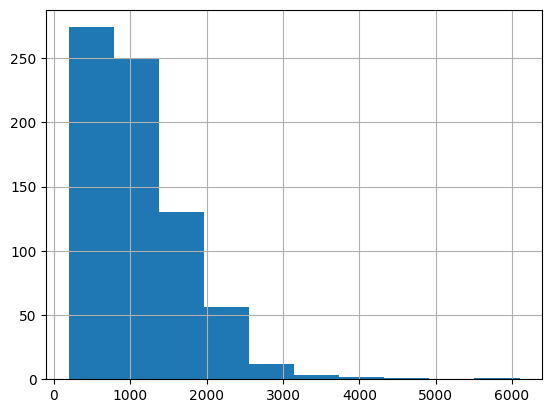

In [214]:
y_train.hist(); #No tiene una distribución normal. Tiene sesgo hacia la derecha (larga cola). Pocos datos en precios más elevados.

-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


Lo mismo que hemos hecho con train lo hacemos con test

In [215]:
X_test["weight_kg"] = X_test ["Weight"].str.replace("kg", " ").astype(float)
X_test["ram_gb"] = X_test ["Ram"].str.replace("GB", " ").astype(int)
X_test ["cpu_ghz"] = X_test ["Cpu"].str.extract (r"(\d+\.?\d*)GHz").astype(float)
X_test ["cpu_tipo"] = X_test ["Cpu"].str.extract (r"(i3|i5|i7|i9|Ryzen 5|Ryzen 7|Celeron|Pentium)")
X_test ["cpu_marca"] = X_test ["Cpu"].str.extract (r"(Intel|AMD)")
X_test ["gpu_marca"] = X_test ["Gpu"].str.extract(r"(Nvidia|AMD|Intel)")
X_test ["memory_gb"] = X_test ["Memory"].str.extract (r"(\d+)").astype(int)
X_test ["company_name"] = X_test ["Company"]
X_test ["pixeles_totales"] = X_test ["ScreenResolution"].str.extract (r'(\d+)x(\d+)').astype (int).prod (axis=1)
X_test ["ppi"] = X_test ["pixeles_totales"] ** 0.5 / X_test ["Inches"]
X_test ["ips_panel"] = X_test ["ScreenResolution"].str.contains ("IPS").astype (int)

In [216]:
X_test = X_test [features]
X_test

,Inches,ram_gb,weight_kg,cpu_ghz,cpu_tipo,cpu_marca,gpu_marca,memory_gb,company_name,pixeles_totales,ppi,ips_panel
laptop_ID,,,,,,,,,,,,
451,15.6,8,2.20,2.8,i7,Intel,Nvidia,128,HP,2073600,92.307692,1
802,15.6,8,2.08,2.5,i5,Intel,AMD,256,Lenovo,2073600,92.307692,0
723,14.0,8,1.87,2.5,i5,Intel,Nvidia,256,Lenovo,2073600,102.857143,1
682,14.0,4,1.63,2.4,i3,Intel,Nvidia,128,HP,2073600,102.857143,1
1306,15.6,4,2.20,1.6,Celeron,Intel,Intel,500,Asus,1049088,65.657049,0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,15.6,8,1.86,2.5,i5,Intel,Intel,1,HP,2073600,92.307692,0
626,11.6,4,1.25,1.6,Celeron,Intel,Intel,32,Acer,1049088,88.297411,1
416,11.6,2,1.15,1.1,Celeron,Intel,Intel,32,Lenovo,1049088,88.297411,0


In [217]:
X_test = pd.get_dummies(X_test, columns=["cpu_tipo", "cpu_marca", "gpu_marca", "company_name", "pixeles_totales"], drop_first=True)
X_test = X_test.reindex (columns=X_train.columns, fill_value=0)

In [218]:
X_train.shape

(729, 42)

In [219]:
X_test.shape

(183, 42)

In [220]:
random_f = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=42)

'''
Usamos n_estimators para tener más arboles y, así tener un mejor promedio
Usamos max_depth = None para que el árbol crezca todo lo necesario
'''

'\nUsamos n_estimators para tener más arboles y, así tener un mejor promedio\nUsamos max_depth = None para que el árbol crezca todo lo necesario\n'

In [221]:
random_f.fit(X_train, y_train) 

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [222]:
y_pred = random_f.predict (X_test)#Ahora haremos la predicción del X_test

In [223]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1400,
                   learning_rate = 0.015,
                   max_depth = 5,
                   subsample = 0.8, #Más robustez
                   colsample_bytree = 0.8, #Reduce correlaciones fuertes
                   random_state = 42)

y_train_log = np.log1p (y_train) #Comprimimos los valores grandes más que los pequeños

xgb.fit (X_train, y_train_log)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [224]:
pred_xgb_test_log = xgb.predict (X_test)
pred_xgb_test = np.expm1(pred_xgb_test_log)

### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [225]:
root_mean_squared_error(y_test, pred_xgb_test) #es un error grande porque del precio el mínimo son 174 y el máximo 1400, y que el error sea de 482 es mucho (un 30%)

342.82378605856553

### 4.3 Optimización (up to you 🫰🏻)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [226]:
X_pred = pd.read_csv("./data/test.csv", index_col= "laptop_ID")
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [227]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [228]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [229]:
X_pred

X_pred ["ram_gb"] = X_pred ["Ram"].str.replace("GB", " ").astype(int)
X_pred ["weight_kg"] = X_pred ["Weight"].str.replace("kg", " ").astype(float)
X_pred ["cpu_ghz"] = X_pred ["Cpu"].str.extract(r"(\d+\.?\d*)GHz").astype(float)
X_pred ["cpu_tipo"] = X_pred ["Cpu"].str.extract (r"(i3|i5|i7|i9|Ryzen 3|Ryzen 7|Celeron|Pentium)")
X_pred ["cpu_marca"] = X_pred ["Cpu"].str.extract (r"(Intel|AMD)")
X_pred ["gpu_marca"] = X_pred ["Gpu"].str.extract(r"(Nvidia|AMD|Intel)")
X_pred ["memory_gb"] = X_pred ["Memory"].str.extract (r"(\d+)").astype (int)
X_pred ["company_name"] = X_pred ["Company"]
X_pred ["pixeles_totales"] = X_pred ["ScreenResolution"].str.extract (r'(\d+)x(\d+)').astype (int).prod (axis=1)
X_pred ["ppi"] = X_pred ["pixeles_totales"] ** 0.5 / X_pred ["Inches"]
X_pred ["ips_panel"] = X_pred ["ScreenResolution"].str.contains ("IPS").astype (int)

In [230]:
X_pred = X_pred[features]

In [231]:
X_pred = pd.get_dummies (X_pred, columns=["cpu_tipo", "cpu_marca", "gpu_marca", "company_name", "pixeles_totales"], drop_first=True)

In [232]:
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

In [233]:
pred_xgb_log = xgb.predict (X_pred)
pred_xgb = np.expm1(pred_xgb_log)

In [234]:
predictions_submit = np.expm1(pred_xgb_log)
predictions_submit

array([1367.7745 ,  301.46283,  364.92194,  877.9974 ,  997.5068 ,
        448.56082,  774.56744,  997.30444, 1152.6794 ,  341.9225 ,
       2443.4587 , 1333.9951 ,  483.30917, 1361.6361 ,  996.1165 ,
        654.8636 , 1300.6093 , 1253.6196 , 1788.4978 ,  620.31757,
       1215.7928 ,  273.99585,  752.4347 , 1144.7778 ,  460.15082,
        728.1277 ,  542.52704,  543.3467 , 2369.7808 , 1021.23346,
       2341.7046 ,  363.28302,  801.86237, 2884.295  , 1909.4548 ,
       1925.9102 ,  640.965  ,  903.15485,  890.7503 , 1429.0413 ,
        571.0023 ,  731.9559 ,  556.374  , 1147.6305 , 1584.1442 ,
       1018.00446,  993.8208 ,  638.3522 ,  800.9158 ,  384.07764,
       2101.5818 ,  720.88806, 1139.1892 ,  538.2235 , 1911.5348 ,
       1816.7849 ,  570.662  , 1000.32465,  795.5753 ,  620.4912 ,
       3056.7612 , 1711.5182 ,  439.44843, 2076.6184 , 1378.4817 ,
       1268.5383 , 1021.08777, 1214.4342 , 1606.1917 , 2267.1025 ,
        762.27985,  478.15436, 1070.4427 , 1699.005  ,  994.99

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [235]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [236]:
sample = pd.read_csv("data/sample_submission.csv")

In [237]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [238]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [239]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index, "Price_in_euros": predictions_submit})

In [240]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1367.774536
1,1281,301.462830
2,1168,364.921936
3,1231,877.997375
4,1020,997.506775


In [241]:
submission.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [242]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [243]:
chequeador(submission)

You're ready to submit!
